<a href="https://colab.research.google.com/github/masoudshahrian/DeepLearning-Code/blob/main/Crop_Train_Test_Split_Run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jessicali9530_celeba_dataset_path = kagglehub.dataset_download('jessicali9530/celeba-dataset')

print('Data source import complete.')


In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.6-cp310-cp310-linux_x86_64.whl size=3590658 sha256=dc6f5494188ab4cc4f90e79d2372886371272e4a9062cade39c50f2c9d618e37
  Stored in directory: /root/.cache/pip/wheels/7c/1d/d1/e69ceb001441acedfa6156acda6c1856699e260ea1a9e6dcc4
Successfully built dlib


In [ ]:
import cv2
import dlib
import os

# مسیر به دایرکتوری تصاویر CelebA
input_dir = '/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/'  # مسیر دایرکتوری تصاویر
output_dir = '/kaggle/working/CelebA_Image_Croped/'  # مسیر دایرکتوری خروجی

# ایجاد دایرکتوری خروجی در صورت عدم وجود
os.makedirs(output_dir, exist_ok=True)

# بارگذاری مدل شناسایی صورت
detector = dlib.get_frontal_face_detector()

# لیست کردن تصاویر در دایرکتوری ورودی
image_count = 0  # شمارنده برای تعداد تصاویر پردازش شده
max_images = 100000  # حداکثر تعداد تصاویری که باید پردازش شوند

for filename in os.listdir(input_dir):
    if (filename.endswith('.jpg') or filename.endswith('.png')) and image_count < max_images:
        # بارگذاری تصویر
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # تبدیل تصویر به خاکستری
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # شناسایی صورت‌ها
        faces = detector(gray)

        # پردازش هر صورت شناسایی شده
        for face in faces:
            # استخراج مختصات صورت
            x, y, w, h = (face.left(), face.top(), face.width(), face.height())

            # محاسبه مرکز صورت
            center_x = x + w // 2
            center_y = y + h // 2

            # محاسبه مختصات جدید برای کراپ
            crop_x1 = max(center_x - 64, 0)
            crop_x2 = min(center_x + 64, image.shape[1])
            crop_y1 = max(center_y - 64, 0)
            crop_y2 = min(center_y + 64, image.shape[0])

            # کراپ کردن تصویر
            cropped_image = image[crop_y1:crop_y2, crop_x1:crop_x2]

            # تغییر اندازه به 128x128
            resized_image = cv2.resize(cropped_image, (128, 128))

            # ذخیره تصویر کراپ شده
            output_path = os.path.join(output_dir, f'cropped_{image_count}.jpg')  # نام فایل خروجی
            cv2.imwrite(output_path, resized_image)

            image_count += 1  # افزایش شمارنده

            # اگر به حداکثر تعداد تصاویر رسیدیم، از حلقه خارج شویم
            if image_count >= max_images:
                break

print(f"تمامی {image_count} تصویر با موفقیت کراپ و ذخیره شدند.")

تمامی 100000 تصویر با موفقیت کراپ و ذخیره شدند.


In [ ]:
import os
import shutil
import random

In [ ]:
# مسیر به دایرکتوری تصاویر ورودی
input_dir = '/kaggle/working/CelebA_Image_Croped/'  # مسیر دایرکتوری تصاویر
train_dir = '/kaggle/working/train/'  # مسیر دایرکتوری train
test_dir = '/kaggle/working/test/'    # مسیر دایرکتوری test



In [ ]:

# import os
# import shutil
# import random

# # مسیر به دایرکتوری تصاویر ورودی
# input_dir = '/content/drive/MyDrive/kaggle-celebA/images/'  # مسیر دایرکتوری تصاویر
# train_dir = '/content/drive/MyDrive/kaggle-celebA/train/'  # مسیر دایرکتوری train
# test_dir = '/content/drive/MyDrive/kaggle-celebA/test/'    # مسیر دایرکتوری test

# ایجاد دایرکتوری‌های train و test در صورت عدم وجود
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# لیست کردن تصاویر در دایرکتوری ورودی
images = [f for f in os.listdir(input_dir) if f.endswith('.jpg') or f.endswith('.png')]

# # اطمینان از اینکه تعداد تصاویر 10000 تا است
# if len(images) < 100000:
#     print(f"تعداد تصاویر موجود کمتر از 20 است: {len(images)}")
# else:
#     # انتخاب 100000 تصویر تصادفی
#     images = random.sample(images, 100000)

# # تصادفی کردن لیست تصاویر
# random.shuffle(images)

# محاسبه تعداد تصاویر برای train و test
train_size = int(0.8 * len(images))  # 80% برای train
test_size = len(images) - train_size   # 20% برای test

# تقسیم تصاویر به train و test
train_images = images[:train_size]
test_images = images[train_size:]

# کپی کردن تصاویر به دایرکتوری‌های مربوطه
for img in train_images:
    shutil.copy(os.path.join(input_dir, img), os.path.join(train_dir, img))

for img in test_images:
    shutil.copy(os.path.join(input_dir, img), os.path.join(test_dir, img))

print(f"تعداد تصاویر در train: {len(train_images)}")
print(f"تعداد تصاویر در test: {len(test_images)}")
print("تقسیم تصاویر با موفقیت انجام شد.")

تعداد تصاویر در train: 80000
تعداد تصاویر در test: 20000
تقسیم تصاویر با موفقیت انجام شد.


In [ ]:
# import os
# import shutil
# import random
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
from skimage.metrics import structural_similarity as ssim

In [ ]:

# Set your image dataset paths
train_path = '/kaggle/working/train'
test_path = '/kaggle/working/test'

In [ ]:
# Load and preprocess the dataset
def load_images(path, img_size=(64, 64)):
    images = []
    for file in glob.glob(path + "/*.jpg"):
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        images.append(img)
    return np.array(images)

# Split images into upper and lower halves
def split_images(images):
    upper_half = []
    lower_half = []
    for img in images:
        h, w, _ = img.shape
        upper_half.append(img[:h//2, :])
        lower_half.append(img[h//2:, :])
    return np.array(upper_half), np.array(lower_half)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# Initiate autoencoder
def build_autoencoder(input_shape):
    encoder_input = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)  # Dropout layer to reduce overfitting

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)  # Dropout layer to reduce overfitting

    x = layers.Flatten()(x)
    encoder_output = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)  # L2 Regularization
    encoder = models.Model(encoder_input, encoder_output)

    # Decoder
    decoder_input = layers.Input(shape=(256,))
    x = layers.Dense((input_shape[0]//4) * (input_shape[1]//4) * 64, activation='relu')(decoder_input)
    x = layers.Reshape((input_shape[0]//4, input_shape[1]//4, 64))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)

    decoder_output = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)

    decoder = models.Model(decoder_input, decoder_output)

    # Complete Autoencoder
    autoencoder_input = layers.Input(shape=input_shape)
    encoded_img = encoder(autoencoder_input)
    decoded_img = decoder(encoded_img)

    autoencoder = models.Model(autoencoder_input, decoded_img)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

In [ ]:
# Load and preprocess the training dataset
train_images = load_images(train_path)
upper_half_train, lower_half_train = split_images(train_images)

# Normalize Data
upper_half_train = upper_half_train / 255.0
lower_half_train = lower_half_train / 255.0

# Build and train the autoencoder
input_shape = upper_half_train.shape[1:]
autoencoder = build_autoencoder(input_shape)

In [ ]:
# input_shape

In [ ]:
len(train_images)

80000

In [ ]:
# Train the model
autoencoder.fit(upper_half_train, lower_half_train, epochs=3, batch_size=32, validation_split=0.1)

# # Save the model
# autoencoder.save('autoencoder_model.h5')

Epoch 1/3


I0000 00:00:1731952741.985836    1431 service.cc:145] XLA service 0x7d50b80018a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731952741.985898    1431 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  33/2250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 2.5494

I0000 00:00:1731952747.820950    1431 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.1558 - val_loss: 0.0390
Epoch 2/3
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0382 - val_loss: 0.0376
Epoch 3/3
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0362 - val_loss: 0.0346


In [ ]:
# Train the model
autoencoder.fit(upper_half_train, lower_half_train, epochs=1000, batch_size=32, validation_split=0.1)

# Save the model
# autoencoder.save('autoencoder_model.h5')

Epoch 1/1000
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0356 - val_loss: 0.0367
Epoch 2/1000
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0352 - val_loss: 0.0341
Epoch 3/1000
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0352 - val_loss: 0.0339
Epoch 4/1000
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0352 - val_loss: 0.0345
Epoch 5/1000
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0348 - val_loss: 0.0343
Epoch 6/1000
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0349 - val_loss: 0.0353
Epoch 7/1000
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0347 - val_loss: 0.0346
Epoch 8/1000
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0349 - val_loss: 0.0335
Epoch 9/1000
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0348 - val_loss: 0.0334
Epoch 10/1000
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0346 - val_loss: 0.0342
Epoch 11/1000
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0346 - val_loss: 0.03

In [ ]:
# Load and preprocess the test dataset
test_images = load_images(test_path)
upper_half_test, lower_half_test = split_images(test_images)

# Normalize test data
upper_half_test = upper_half_test / 255.0

# Predict the lower half using the model
lower_half_pred = autoencoder.predict(upper_half_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
len(test_images)

20000

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Upper half shape: (32, 64, 3), Prediction shape: (32, 64, 3)
Upper half shape: (32, 64, 3), Prediction shape: (32, 64, 3)
Upper half shape: (32, 64, 3), Prediction shape: (32, 64, 3)
Upper half shape: (32, 64, 3), Prediction shape: (32, 64, 3)
Upper half shape: (32, 64, 3), Prediction shape: (32, 64, 3)
Upper half shape: (32, 64, 3), Prediction shape: (32, 64, 3)
Upper half shape: (32, 64, 3), Prediction shape: (32, 64, 3)
Upper half shape: (32, 64, 3), Prediction shape: (32, 64, 3)
Upper half shape: (32, 64, 3), Prediction shape: (32, 64, 3)
Upper half shape: (32, 64, 3), Prediction shape: (32, 64, 3)


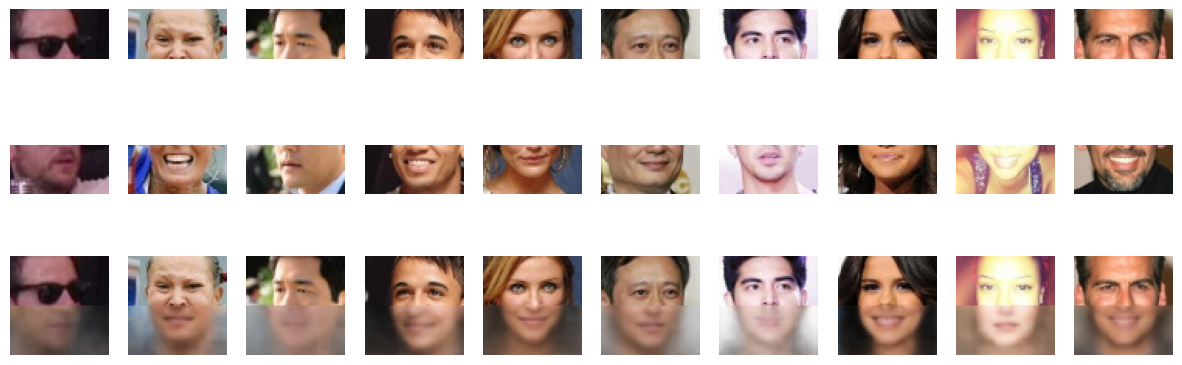

In [ ]:
def display_results(model, upper_half_test, lower_half_pred):
    predictions = model.predict(upper_half_test)

    fig, axes = plt.subplots(3, 10, figsize=(15, 5))

    for i in range(10):
        # چاپ ابعاد نیمه بالایی و پیش‌بینی
        print(f"Upper half shape: {upper_half_test[i].shape}, Prediction shape: {predictions[i].shape}")

        # نمایش نیمه بالایی
        axes[0, i].imshow(upper_half_test[i])
        axes[0, i].axis('off')

        # نمایش نیمه پایینی
        axes[1, i].imshow(lower_half_pred[i])
        axes[1, i].axis('off')

        # ترکیب نیمه بالایی و پیش‌بینی
        combined_image = np.vstack((upper_half_test[i], predictions[i]))

        # نمایش تصویر ترکیبی
        axes[2, i].imshow(combined_image)
        axes[2, i].axis('off')

    plt.show()

# فرض کنید که autoencoder، upper_half و lower_half از قبل تعریف شده‌اند
display_results(autoencoder, upper_half_test, lower_half_test)

In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Function to calculate PSNR
def calculate_psnr(original, predicted):
    original = original.astype(np.float32)
    predicted = predicted.astype(np.float32)
    mse = np.mean((original - predicted) ** 2)
    if mse == 0:
        return float('inf')  # Infinite PSNR if images are identical
    max_pixel = 1.0  # Assuming images are normalized to [0, 1]
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to calculate SSIM with a custom window size
def calculate_ssim(image1, image2):
    # print(f"Image1 shape: {image1.shape}, Image2 shape: {image2.shape}")
    if image1.shape[0] < 7 or image1.shape[1] < 7:
        print("Image dimensions are too small for SSIM calculation.")
        return None
    else:
        return ssim(image1, image2, multichannel=True, win_size=3, data_range=1)  # Assuming images are in range [0, 1]

# Calculate metrics
psnr_values = []
ssim_values = []

for i in range(len(lower_half_test)):
    psnr_value = calculate_psnr(lower_half_test[i], lower_half_pred[i])
    ssim_value = calculate_ssim(lower_half_test[i], lower_half_pred[i])  # Use the custom function

    psnr_values.append(psnr_value)
    if ssim_value is not None:  # Only append if SSIM was calculated
        ssim_values.append(ssim_value)

# Print average metrics
print(f"Average PSNR: {np.mean(psnr_values)}")
if ssim_values:  # Check if SSIM values were calculated
    print(f"Average SSIM: {np.mean(ssim_values)}")

Average PSNR: -41.94657195787587
Average SSIM: 0.00016065911236765582


In [ ]:
# Save the model
autoencoder.save('autoencoder_model.h5')

In [ ]:
autoencoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 256)            │     2,117,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_3 (Functional)       │ (None, 32, 64, 3)      │     2,161,987 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,836,747 (48.97 MB)

 Trainable params: 4,278,787 (16.32 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 8,557,576 (32.64 MB)

In [ ]:
# # Load and preprocess the new image
# def load_and_preprocess_image(image_path, img_size=(64, 64)):
#     img = cv2.imread(image_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, img_size)
#     return img


# # Split the image into upper half
# def split_image(img):
#     h, w, _ = img.shape
#     upper_half = img[:h//2, :]
#     return upper_half

# # ترکیب نیمه بالا و پایین و نمایش تصویر کامل
# def combine_and_display(upper_half, lower_half_pred):
#     full_face = np.vstack((upper_half, lower_half_pred))
#     plt.imshow(full_face)
#     plt.axis('off')
#     plt.show()


# # تابع پیش‌بینی و نمایش صورت کامل
# def predict_and_display_full_face(autoencoder, image_path):
#     new_image = load_and_preprocess_image(new_image_path)
#     upper_half = split_image(new_image)
#     upper_half_normalized = (upper_half.astype(np.float32) - 127.5) / 127.5
#     upper_half_normalized = np.expand_dims(upper_half_normalized, axis=0)

#     lower_half_pred = autoencoder.predict(upper_half_normalized)[0]
#     lower_half_pred = (lower_half_pred * 127.5 + 127.5).astype(np.uint8)

#     # combined_image = np.vstack((upper_half, lower_half_pred))

#     combine_and_display(upper_half, lower_half_pred)

# # مسیر تصویر جدید
# new_image_path ="/content/195579.jpg"# "/path/to/new/image.jpg"
# predict_and_display_full_face(autoencoder, new_image_path)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')